In [1]:
import pandas as pd
import os

In [2]:
carpeta1="MesJunio"
carpeta2="MesJulio"

In [3]:
def listar_archivos_csv(carpeta):
    return [os.path.join(carpeta,archivo) for archivo 
            in os.listdir(carpeta) if 
            archivo.endswith('.csv')]

In [4]:
archivos_carpeta1=listar_archivos_csv(carpeta1)
archivos_carpeta2=listar_archivos_csv(carpeta2)

In [5]:
archivos_csv=archivos_carpeta1+archivos_carpeta2

In [6]:
dataframes=[pd.read_csv(archivo) for archivo in archivos_csv]

In [7]:
df_conbinado=pd.concat(dataframes,ignore_index=True)

In [8]:
df_conbinado['Mb_dl']=df_conbinado['l_thrp_bits_dl']/1000000
df_conbinado['Mb_ul']=df_conbinado['l_thrp_bits_ul']/1000000
df_conbinado['totalMb']=df_conbinado['Mb_dl']+df_conbinado['Mb_ul']
df_conbinado.head()


,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [9]:
df_conbinado.shape

(79027248, 13)

In [10]:
df_or=df_conbinado.groupby(['fecha', 'altan_site_id','hora']).agg({'totalMb': 'sum'}).reset_index()
df_or.head()

,fecha,altan_site_id,hora,totalMb
0,2024-06-01,7,00:00,65538.648784
1,2024-06-01,7,01:00,38367.554416
2,2024-06-01,7,02:00,42206.961264
3,2024-06-01,7,03:00,28541.201864
4,2024-06-01,7,04:00,28895.477256


In [11]:
df_or['fecha'] = pd.to_datetime(df_or['fecha'])
print(df_or.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
hora                     object
totalMb                 float64
dtype: object


In [12]:
df_or['hora'] = pd.to_datetime(df_or['hora'])
print(df_or.dtypes)

C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_14368\757462324.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_or['hora'] = pd.to_datetime(df_or['hora'])


fecha            datetime64[ns]
altan_site_id             int64
hora             datetime64[ns]
totalMb                 float64
dtype: object


In [13]:
df_or['dia_semana'] = df_or['fecha'].dt.day_name(locale="es_Es")
df_or.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,2024-10-22 00:00:00,65538.648784,Sábado
1,2024-06-01,7,2024-10-22 01:00:00,38367.554416,Sábado
2,2024-06-01,7,2024-10-22 02:00:00,42206.961264,Sábado
3,2024-06-01,7,2024-10-22 03:00:00,28541.201864,Sábado
4,2024-06-01,7,2024-10-22 04:00:00,28895.477256,Sábado


In [14]:
filas_sabado = df_or[df_or['dia_semana'] == 'Sábado']
filas_sabado.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,2024-10-22 00:00:00,65538.648784,Sábado
1,2024-06-01,7,2024-10-22 01:00:00,38367.554416,Sábado
2,2024-06-01,7,2024-10-22 02:00:00,42206.961264,Sábado
3,2024-06-01,7,2024-10-22 03:00:00,28541.201864,Sábado
4,2024-06-01,7,2024-10-22 04:00:00,28895.477256,Sábado


In [15]:
sabado=filas_sabado.groupby('hora').agg({'totalMb':'sum'}).reset_index()
sabado.head(10)

,hora,totalMb
0,2024-10-22 00:00:00,7.804274e+09
1,2024-10-22 01:00:00,5.460948e+09
2,2024-10-22 02:00:00,3.784955e+09
3,2024-10-22 03:00:00,2.849230e+09
4,2024-10-22 04:00:00,2.594952e+09
5,2024-10-22 05:00:00,3.394312e+09
6,2024-10-22 06:00:00,5.623471e+09
7,2024-10-22 07:00:00,7.795740e+09
8,2024-10-22 08:00:00,9.211178e+09
9,2024-10-22 09:00:00,9.980930e+09


In [16]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [17]:
df_conbinado.dtypes

fecha                                   object
hora                                    object
altan_site_id                            int64
sector                                   int64
cell_id                                  int64
estado                                  object
l_thrp_bits_dl                           int64
l_thrp_bits_ul                           int64
cast(ctgs.latitud as decimal(9,5))     float64
cast(ctgs.longitud as decimal(9,5))    float64
Mb_dl                                  float64
Mb_ul                                  float64
totalMb                                float64
dtype: object

In [18]:
df=df_conbinado.groupby(['fecha', 'altan_site_id','hora']).agg({'totalMb': 'sum'}).reset_index()
df.head()

,fecha,altan_site_id,hora,totalMb
0,2024-06-01,7,00:00,65538.648784
1,2024-06-01,7,01:00,38367.554416
2,2024-06-01,7,02:00,42206.961264
3,2024-06-01,7,03:00,28541.201864
4,2024-06-01,7,04:00,28895.477256


In [19]:
df['fecha'] = pd.to_datetime(df['fecha'])
print(df.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
hora                     object
totalMb                 float64
dtype: object


In [20]:
df['dia_semana'] = df['fecha'].dt.day_name(locale="es_Es")
df.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,00:00,65538.648784,Sábado
1,2024-06-01,7,01:00,38367.554416,Sábado
2,2024-06-01,7,02:00,42206.961264,Sábado
3,2024-06-01,7,03:00,28541.201864,Sábado
4,2024-06-01,7,04:00,28895.477256,Sábado


In [21]:
filas_sabado = df[df['dia_semana'] == 'Sábado']
filas_sabado.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,00:00,65538.648784,Sábado
1,2024-06-01,7,01:00,38367.554416,Sábado
2,2024-06-01,7,02:00,42206.961264,Sábado
3,2024-06-01,7,03:00,28541.201864,Sábado
4,2024-06-01,7,04:00,28895.477256,Sábado


In [22]:
sabado=filas_sabado.groupby('hora').agg({'totalMb':'sum'}).reset_index()
sabado.head()

,hora,totalMb
0,00:00,7.804274e+09
1,01:00,5.460948e+09
2,02:00,3.784955e+09
3,03:00,2.849230e+09
4,04:00,2.594952e+09


In [23]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

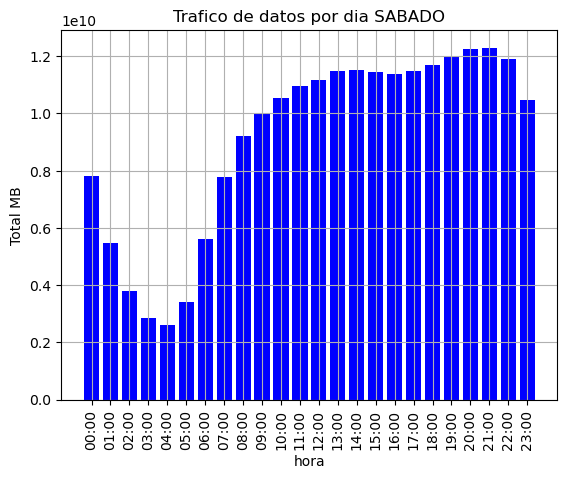

In [24]:
plt.bar(sabado['hora'],sabado['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('Trafico de datos por dia SABADO')
plt.xlabel('hora')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

In [25]:
filas_domingo = df[df['dia_semana'] == 'Domingo']
filas_domingo.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
162624,2024-06-02,7,00:00,72096.001536,Domingo
162625,2024-06-02,7,01:00,80557.551040,Domingo
162626,2024-06-02,7,02:00,15275.268112,Domingo
162627,2024-06-02,7,03:00,9065.740040,Domingo
162628,2024-06-02,7,04:00,9622.787504,Domingo


In [26]:
domingo=filas_domingo.groupby('hora').agg({'totalMb':'sum'}).reset_index()
domingo.head()

,hora,totalMb
0,00:00,8.168216e+09
1,01:00,5.803512e+09
2,02:00,4.013051e+09
3,03:00,2.955075e+09
4,04:00,2.495609e+09


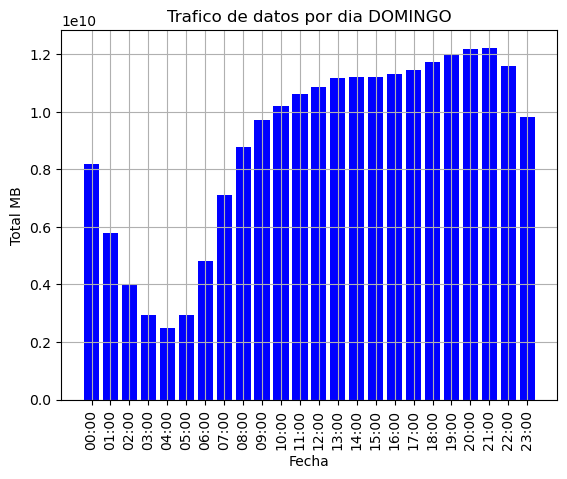

In [27]:
plt.bar(domingo['hora'],domingo['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('Trafico de datos por dia DOMINGO')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

In [28]:
filas_lunes= df[df['dia_semana'] == 'Lunes']
filas_lunes.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
325248,2024-06-03,7,00:00,66469.423384,Lunes
325249,2024-06-03,7,01:00,32754.282480,Lunes
325250,2024-06-03,7,02:00,19442.640752,Lunes
325251,2024-06-03,7,03:00,14215.703512,Lunes
325252,2024-06-03,7,04:00,23650.250408,Lunes


In [29]:
lunes=filas_lunes.groupby('hora').agg({'totalMb':'sum'}).reset_index()
lunes.head()

,hora,totalMb
0,00:00,7.111202e+09
1,01:00,4.692991e+09
2,02:00,3.156696e+09
3,03:00,2.379841e+09
4,04:00,2.266319e+09


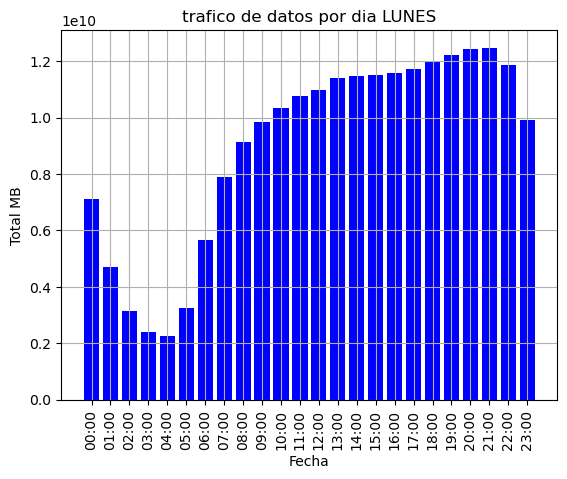

In [30]:
plt.bar(lunes['hora'],lunes['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('trafico de datos por dia LUNES')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

In [31]:
filas_martes= df[df['dia_semana'] == 'Martes']
filas_miercoles= df[df['dia_semana'] == 'Miércoles']
filas_jueves= df[df['dia_semana'] == 'Jueves']
filas_viernes= df[df['dia_semana'] == 'Viernes']

In [32]:
martes=filas_martes.groupby('hora').agg({'totalMb':'sum'}).reset_index()
miercoles=filas_miercoles.groupby('hora').agg({'totalMb':'sum'}).reset_index()
jueves=filas_jueves.groupby('hora').agg({'totalMb':'sum'}).reset_index()
viernes=filas_viernes.groupby('hora').agg({'totalMb':'sum'}).reset_index()

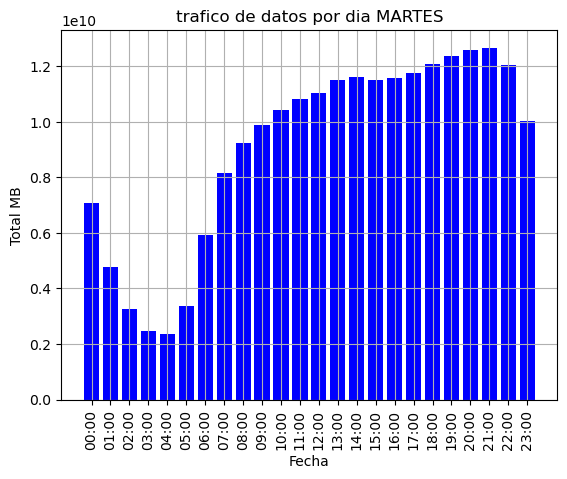

In [33]:
plt.bar(martes['hora'],martes['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('trafico de datos por dia MARTES')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

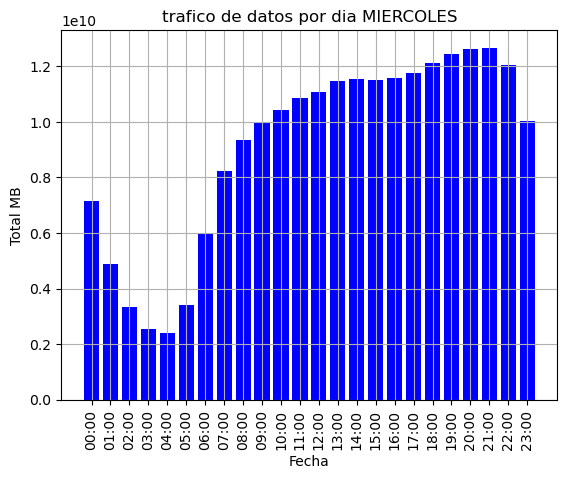

In [34]:
plt.bar(miercoles['hora'],miercoles['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('trafico de datos por dia MIERCOLES')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

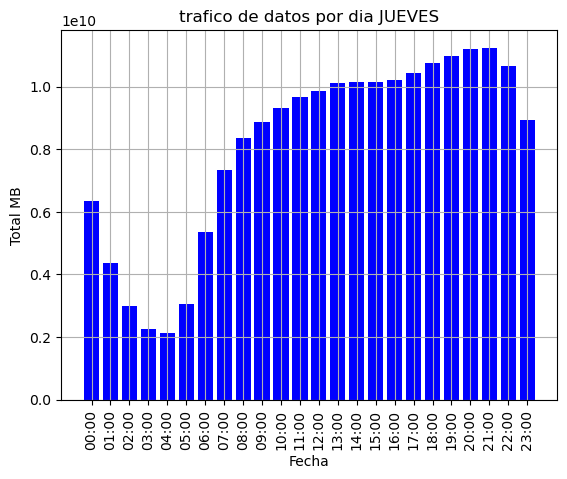

In [35]:
plt.bar(jueves['hora'],jueves['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('trafico de datos por dia JUEVES')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

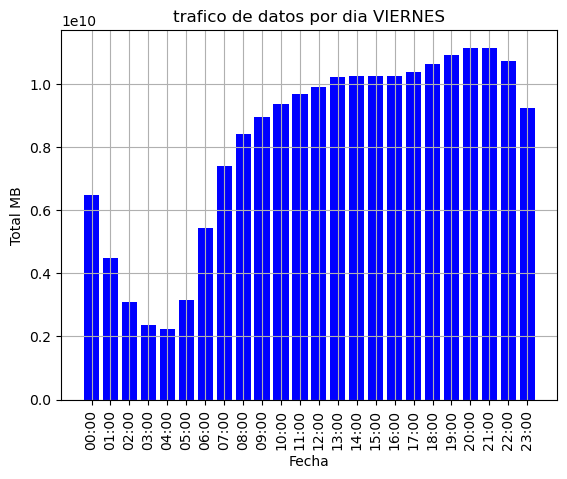

In [36]:
plt.bar(viernes['hora'],viernes['totalMb'],color='blue')
# Mostrar la gráfica
plt.title('trafico de datos por dia VIERNES')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

In [37]:
df_fechaT=df_conbinado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()

In [38]:
df_fechaT.head()

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [39]:
df_fechaT['fecha'] = pd.to_datetime(df_fechaT['fecha'])
print(df_fechaT.dtypes)

fecha      datetime64[ns]
totalMb           float64
dtype: object


In [40]:
df_fechaT.set_index('fecha', inplace=True)


<Figure size 1200x400 with 0 Axes>

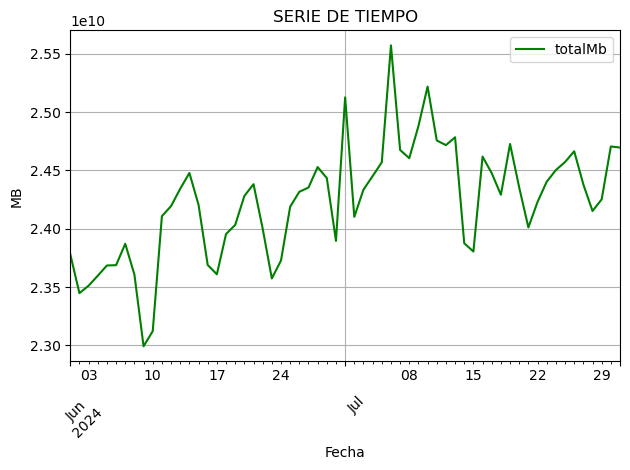

In [41]:
#df_fechaT.set_index('fecha', inplace=True)
plt.figure(figsize=(12,4))  # Ajusta el tamaño de la figura
df_fechaT.plot(color='green')
# Añadir título y etiquetas
plt.title('SERIE DE TIEMPO')
plt.xlabel('Fecha')
plt.ylabel('MB')
# Rotar etiquetas del eje X (fechas) para mejor legibilidad
plt.xticks(rotation=45)
# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)
# Ajustar márgenes y mostrar la gráfica
plt.tight_layout()
plt.show()

In [42]:
print(df_fechaT.dtypes)

totalMb    float64
dtype: object


In [43]:
df.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,00:00,65538.648784,Sábado
1,2024-06-01,7,01:00,38367.554416,Sábado
2,2024-06-01,7,02:00,42206.961264,Sábado
3,2024-06-01,7,03:00,28541.201864,Sábado
4,2024-06-01,7,04:00,28895.477256,Sábado


In [44]:
df_filtrado = df[df['totalMb'] == 0]
df_filtrado.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
120,2024-06-01,12,00:00,0.0,Sábado
121,2024-06-01,12,01:00,0.0,Sábado
122,2024-06-01,12,02:00,0.0,Sábado
123,2024-06-01,12,03:00,0.0,Sábado
124,2024-06-01,12,04:00,0.0,Sábado


In [45]:
df_or.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
0,2024-06-01,7,2024-10-22 00:00:00,65538.648784,Sábado
1,2024-06-01,7,2024-10-22 01:00:00,38367.554416,Sábado
2,2024-06-01,7,2024-10-22 02:00:00,42206.961264,Sábado
3,2024-06-01,7,2024-10-22 03:00:00,28541.201864,Sábado
4,2024-06-01,7,2024-10-22 04:00:00,28895.477256,Sábado


In [46]:
df_hr= df_or[df_or['totalMb'] == 0]
df_hr.head()

,fecha,altan_site_id,hora,totalMb,dia_semana
120,2024-06-01,12,2024-10-22 00:00:00,0.0,Sábado
121,2024-06-01,12,2024-10-22 01:00:00,0.0,Sábado
122,2024-06-01,12,2024-10-22 02:00:00,0.0,Sábado
123,2024-06-01,12,2024-10-22 03:00:00,0.0,Sábado
124,2024-06-01,12,2024-10-22 04:00:00,0.0,Sábado


In [47]:
df_hr.shape

(726557, 5)

In [48]:
df_filtradoCE7 = df_hr[df_hr['altan_site_id'] == 7]
df_filtradoCE7.head()

,fecha,altan_site_id,hora,totalMb,dia_semana


In [49]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [50]:
df_caida = df_conbinado[df_conbinado['totalMb'] == 0]
df_caida.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [51]:
df_sector7= df_caida[df_caida['altan_site_id'] == 7]
df_sector7.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [52]:
df_sector7.shape

(1213, 13)

In [53]:
df_sector7['fecha'] = pd.to_datetime(df_sector7['fecha'])
print(df.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
hora                     object
totalMb                 float64
dia_semana               object
dtype: object


C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_14368\696659950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector7['fecha'] = pd.to_datetime(df_sector7['fecha'])


In [54]:
df_sector7f=df_sector7.groupby('fecha').agg({'altan_site_id':'sum'}).reset_index()
df_sector7f.head()

,fecha,altan_site_id
0,2024-06-01,161
1,2024-06-02,154
2,2024-06-03,154
3,2024-06-04,168
4,2024-06-05,168


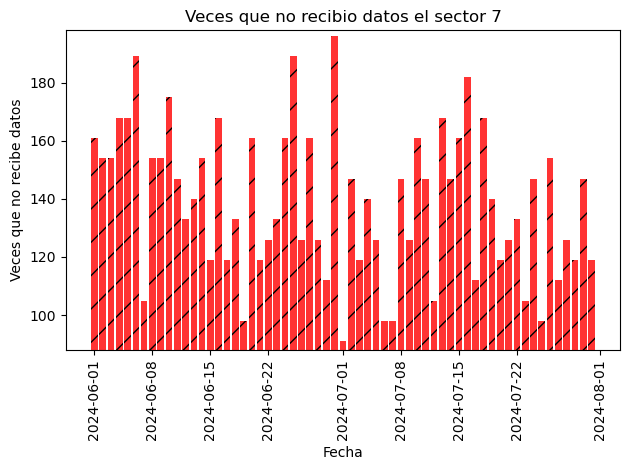

In [55]:
plt.bar(df_sector7f['fecha'],df_sector7f['altan_site_id'],width=0.8,color='red',alpha=0.8,hatch='/')
plt.ylim(88,198)
plt.title('Veces que no recibio datos el sector 7')
plt.xlabel('Fecha')
plt.ylabel('Veces que no recibe datos')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [56]:
conteo_valores = df_conbinado['altan_site_id'].value_counts()
conteo_valores

altan_site_id
141296    43920
140453    26352
141167    26352
140795    26352
140429    26352
          ...  
110337     1464
110336     1464
190566     1464
134090      744
270394      744
Name: count, Length: 6926, dtype: int64

In [57]:
conteo_valores.shape

(6926,)

In [58]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [59]:
df_cai= df_conbinado[df_conbinado['totalMb'] == 0]
df_cai.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [60]:
df_cai['fecha'] = pd.to_datetime(df_cai['fecha'])
print(df_cai.dtypes)

fecha                                  datetime64[ns]
hora                                           object
altan_site_id                                   int64
sector                                          int64
cell_id                                         int64
estado                                         object
l_thrp_bits_dl                                  int64
l_thrp_bits_ul                                  int64
cast(ctgs.latitud as decimal(9,5))            float64
cast(ctgs.longitud as decimal(9,5))           float64
Mb_dl                                         float64
Mb_ul                                         float64
totalMb                                       float64
dtype: object


C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_14368\3925861509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cai['fecha'] = pd.to_datetime(df_cai['fecha'])


In [61]:
df_cai=df_cai.groupby('fecha').agg({'altan_site_id':'sum'}).reset_index()
df_cai.head()

,fecha,altan_site_id
0,2024-06-01,22932533208
1,2024-06-02,23171693541
2,2024-06-03,23328387517
3,2024-06-04,23121660307
4,2024-06-05,22371451363


In [62]:
df_cai.set_index('fecha', inplace=True)

<Figure size 1200x400 with 0 Axes>

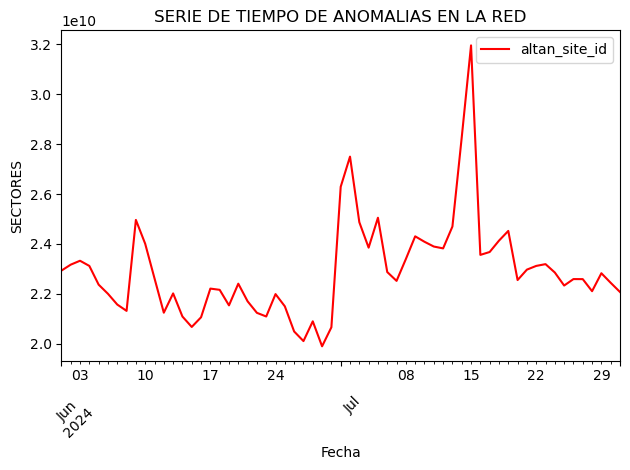

In [63]:
#df_fechaT.set_index('fecha', inplace=True)
plt.figure(figsize=(12,4))  # Ajusta el tamaño de la figura
df_cai.plot(color='red')
# Añadir título y etiquetas
plt.title('SERIE DE TIEMPO DE ANOMALIAS EN LA RED')
plt.xlabel('Fecha')
plt.ylabel('SECTORES')
# Rotar etiquetas del eje X (fechas) para mejor legibilidad
plt.xticks(rotation=45)
# Mostrar la cuadrícula para facilitar la lectura
#plt.grid(True)
# Ajustar márgenes y mostrar la gráfica
plt.tight_layout()
plt.show()

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
descompose=seasonal_decompose(df_cai)

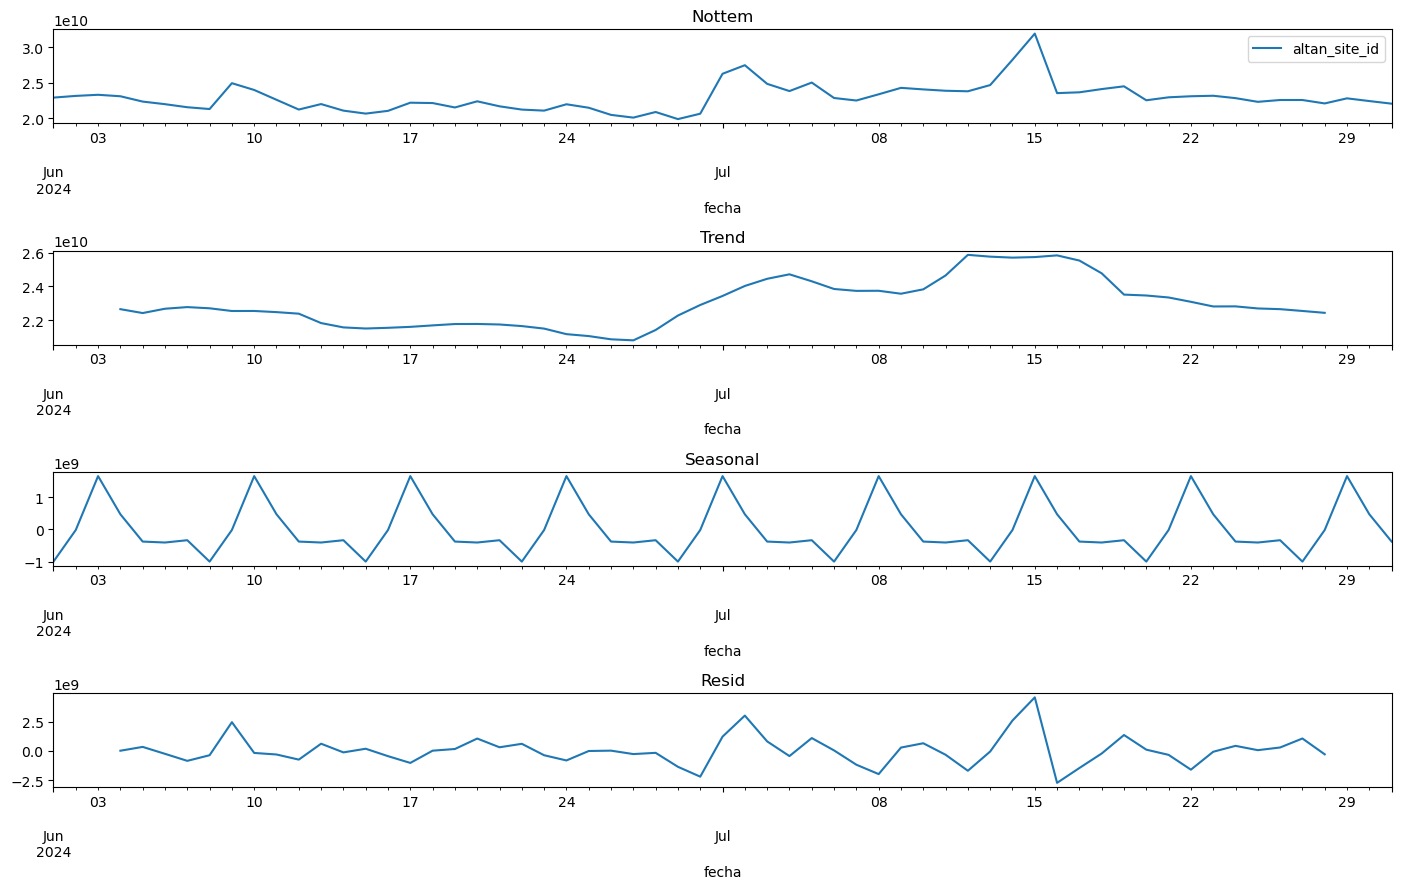

In [66]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(14,9))
df_cai.plot(ax=ax1)
descompose.trend.plot(ax=ax2)
descompose.seasonal.plot(ax=ax3)
descompose.resid.plot(ax=ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonal")
ax4.set_title("Resid")
plt.tight_layout()

In [67]:
sns.set()

<Axes: xlabel='fecha'>

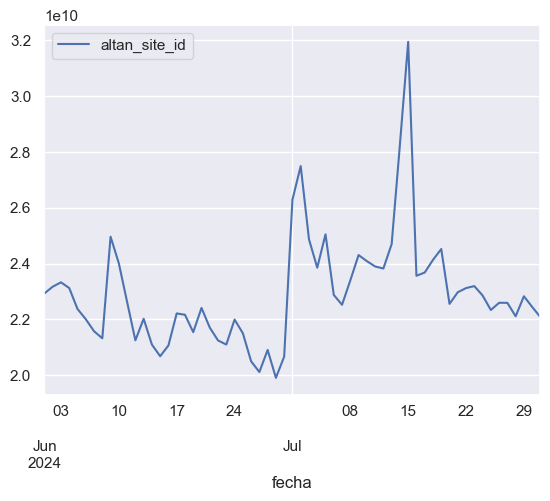

In [68]:
df_cai.plot()

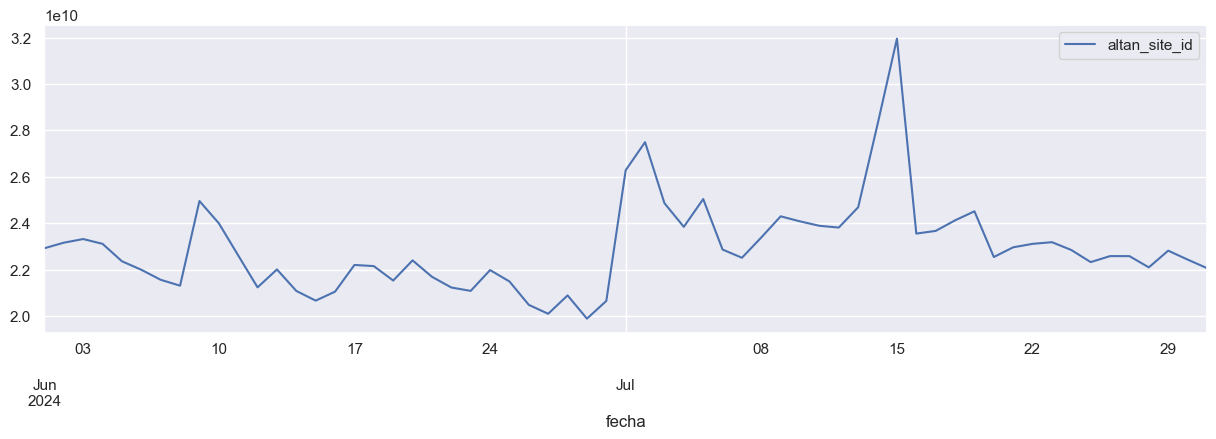

In [69]:
fix,ax=plt.subplots(figsize=(15,4))
df_cai.plot(ax=ax)
plt.show()

In [74]:
df_cai.head()

,altan_site_id
fecha,
2024-06-01,22932533208
2024-06-02,23171693541
2024-06-03,23328387517
2024-06-04,23121660307
2024-06-05,22371451363


In [75]:
df_cai1=df_conbinado[df_conbinado['totalMb']==0]
df_cai1.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [76]:
df_cai1['altan_site_id']=1

C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_14368\764808016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cai1['altan_site_id']=1


In [77]:
df_cai1.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,1,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,1,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,1,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,1,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,1,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [79]:
df_cai1=df_cai1.groupby('fecha').agg({'altan_site_id':'sum'}).reset_index()
df_cai1.head()

,fecha,altan_site_id
0,2024-06-01,135652
1,2024-06-02,138127
2,2024-06-03,138014
3,2024-06-04,136938
4,2024-06-05,132298


In [80]:
df_cai1['fecha'] = pd.to_datetime(df_cai1['fecha'])
print(df_cai1.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
dtype: object


In [81]:
df_cai1.set_index('fecha', inplace=True)

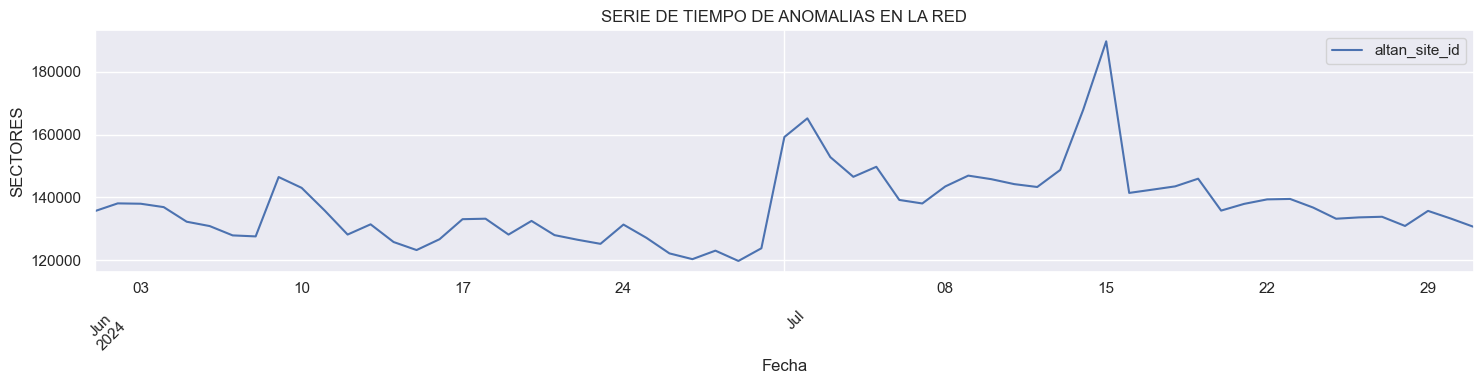

In [82]:
fix,ax=plt.subplots(figsize=(15,4))
df_cai1.plot(ax=ax)
plt.title('SERIE DE TIEMPO DE ANOMALIAS EN LA RED')
plt.xlabel('Fecha')
plt.ylabel('SECTORES')
# Rotar etiquetas del eje X (fechas) para mejor legibilidad
plt.xticks(rotation=45)
# Mostrar la cuadrícula para facilitar la lectura
#plt.grid(True)
# Ajustar márgenes y mostrar la gráfica
plt.tight_layout()
plt.show()

In [85]:
descompose1=seasonal_decompose(df_cai1,model="addtive")

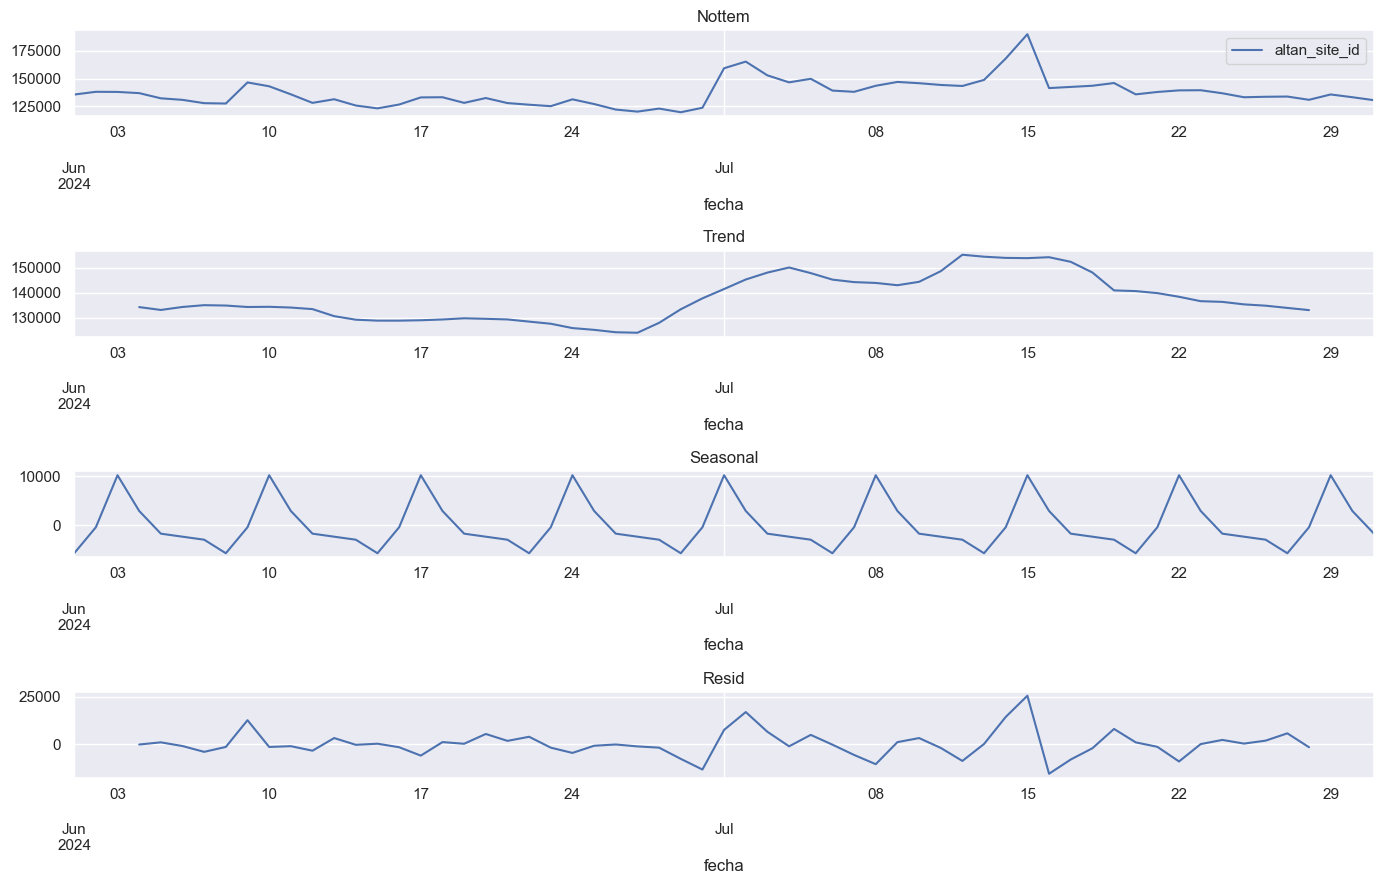

In [86]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(14,9))
df_cai1.plot(ax=ax1)
descompose1.trend.plot(ax=ax2)
descompose1.seasonal.plot(ax=ax3)
descompose1.resid.plot(ax=ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonal")
ax4.set_title("Resid")
plt.tight_layout()

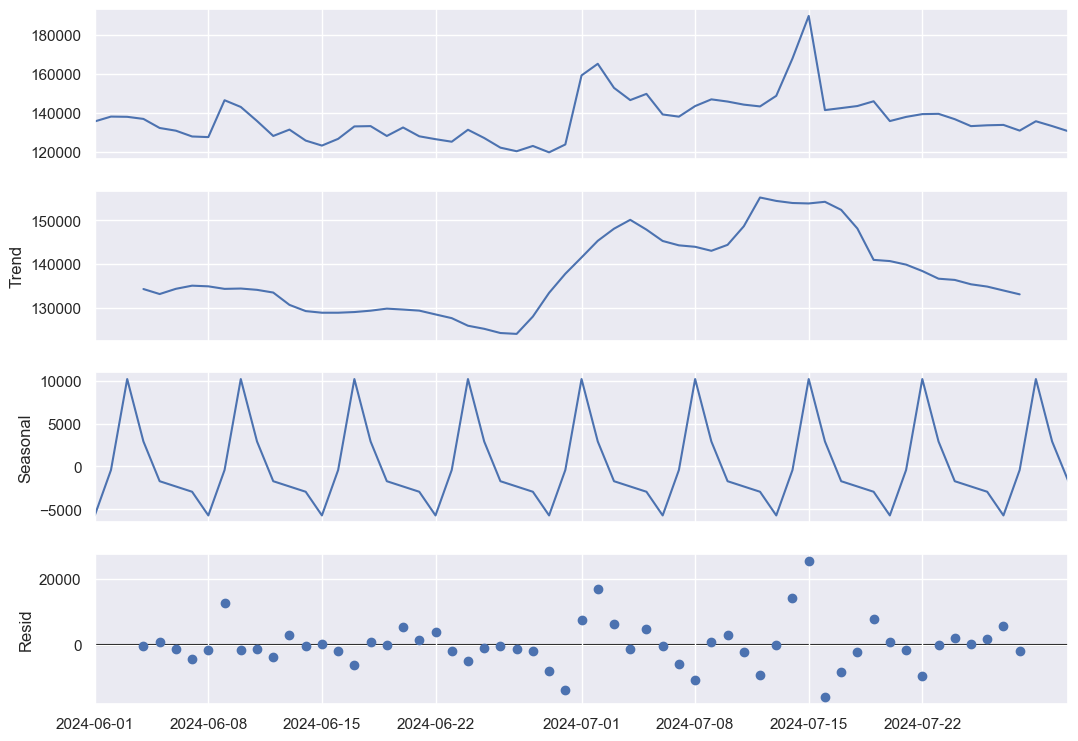

In [87]:
fig=descompose1.plot()
fig.set_size_inches((12,8))

In [90]:
df_cai1.dtypes

altan_site_id    int64
dtype: object

In [91]:
df_cai1.head()

,altan_site_id
fecha,
2024-06-01,135652
2024-06-02,138127
2024-06-03,138014
2024-06-04,136938
2024-06-05,132298


In [94]:
df_cai1.tail()

,altan_site_id
fecha,
2024-07-27,133873
2024-07-28,130956
2024-07-29,135743
2024-07-30,133281
2024-07-31,130628
